In [2]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *
from rsna_retro.seutao import *

Loading imports


In [5]:
dls = get_seutao_dls(Meta.df_comb1, np_file, csv_file, bs=64)

loading features
Done loading features


## Load

In [4]:
class SeqHead(nn.Module):
    def __init__(self):
        super().__init__()
        d_model = 2048+6+1
        hidden = 96
        self.lstm = nn.LSTM(input_size=d_model, hidden_size=hidden, num_layers=2, bidirectional=True)
        self.head = nn.Sequential(nn.Linear(hidden*2,6))
        
    def forward(self, x, preds):
        feat, _ = self.lstm(x.transpose(0,1))
        return self.head(feat.transpose(0,1))

In [4]:
m = SeqHead().cuda()

In [5]:
learn = get_learner(dls, m)

In [7]:
name = 'seutao_feat_simple_lstm_10ep'

In [6]:
learn.add_cb(DePadLoss(), SaveModelCallback(name))

## Train

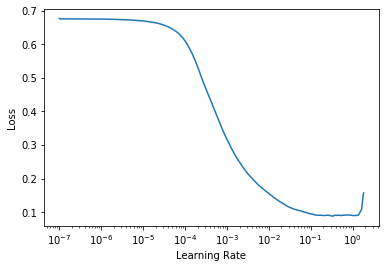

In [8]:
learn.lr_find(num_it=500)

In [8]:
do_fit(learn, 10, 1e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.077514,0.069136,0.977404,0.960500,00:15
1,0.063761,0.064656,0.978109,0.961021,00:15
2,0.060551,0.063398,0.978634,0.961423,00:15
3,0.059689,0.062393,0.978724,0.960796,00:15
4,0.059597,0.062741,0.978580,0.960216,00:15
5,0.058604,0.061983,0.978932,0.962051,00:15
6,0.055716,0.060851,0.979155,0.961542,00:15
7,0.053738,0.061095,0.978938,0.961198,00:15
8,0.053549,0.060595,0.979141,0.961530,00:15
9,0.051147,0.060652,0.979123,0.961648,00:15


## Submit

In [ ]:
submit_predictions(m, f'runs/{name}-1', f'subm/{name}', 'testing seutao features simple lstm 10ep (instead of 20)')

loading features
Done loading features


In [9]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 13827662,
 'totalBytes': 27277209,
 'date': '2019-12-17T10:27:41.53Z',
 'description': 'testing seutao features simple lstm',
 'errorDescription': None,
 'fileName': 'seutao_feat_simple_lstm.csv',
 'publicScore': '1.34860',
 'privateScore': '0.04873',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/13827662/13827662.raw'}